In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('cleaned_data.csv')

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,year,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,1.0,1.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,4.0,0.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,4.0,1.0,yes,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,2.0,1.0,no,no,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,4.0,1.0,no,yes,telephone,may,2008,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40782,73,retired,married,5.0,1.0,yes,no,cellular,nov,2010,...,1,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
40783,46,blue-collar,married,5.0,1.0,no,no,cellular,nov,2010,...,1,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
40784,56,retired,married,6.0,1.0,yes,no,cellular,nov,2010,...,2,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
40785,44,technician,married,5.0,1.0,no,no,cellular,nov,2010,...,1,-1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'year', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# Drop as stated in problem statement
df = df.drop(['duration'], axis=1)

In [7]:
# List of categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars)

In [8]:
# Encode y variable
df_encoded['y'] = df_encoded['y'].map({'no': 0, 'yes': 1})

In [9]:
# Seperate X, y
X = df_encoded
y = df_encoded['y'] 

In [10]:
# Split data into train and test with 80/20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32629, 59)
(8158, 59)
(32629,)
(8158,)


In [12]:
# Change data types for X and y
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [13]:
# Feautres in dataset
num_features = df.shape[1]
num_features

21

In [14]:
# Neural network model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
# First layer is determined by number of feautres in training data
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(16, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

In [15]:
# Configure learning process of model
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
# Fit model 
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
1020/1020 [==============================] - 1s 649us/step - loss: 5.2767 - accuracy: 0.8443
Epoch 2/50
1020/1020 [==============================] - 1s 643us/step - loss: 0.6809 - accuracy: 0.8712
Epoch 3/50
1020/1020 [==============================] - 1s 632us/step - loss: 0.4849 - accuracy: 0.8914
Epoch 4/50
1020/1020 [==============================] - 1s 657us/step - loss: 0.4400 - accuracy: 0.9094
Epoch 5/50
1020/1020 [==============================] - 1s 627us/step - loss: 0.4546 - accuracy: 0.9184
Epoch 6/50
1020/1020 [==============================] - 1s 627us/step - loss: 0.2900 - accuracy: 0.9410
Epoch 7/50
1020/1020 [==============================] - 1s 624us/step - loss: 0.1965 - accuracy: 0.9643
Epoch 8/50
1020/1020 [==============================] - 1s 616us/step - loss: 0.2406 - accuracy: 0.9738
Epoch 9/50
1020/1020 [==============================] - 1s 638us/step - loss: 0.5253 - accuracy: 0.9535
Epoch 10/50
1020/1020 [==============================] - 1s 695u

In [16]:
# Evaluate the model 
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model without class weights: Loss = {loss}, Accuracy = {accuracy}")

255/255 [==============================] - 0s 563us/step - loss: 2.3037e-05 - accuracy: 1.0000
Model without class weights: Loss = 2.303668406966608e-05, Accuracy = 1.0


The model has achieved a very high accuracy of 1.0 on the test data, which indicates that the model is performing extremely well and making correct predictions for all the samples in the test set

In [17]:
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7182
           1       1.00      1.00      1.00       976

    accuracy                           1.00      8158
   macro avg       1.00      1.00      1.00      8158
weighted avg       1.00      1.00      1.00      8158



In [22]:
# Create y prediction
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)  # Convert probability predictions to binary

255/255 [==============================] - 0s 465us/step


Classification report came back as all 1s indicating a perfect performance for the model 

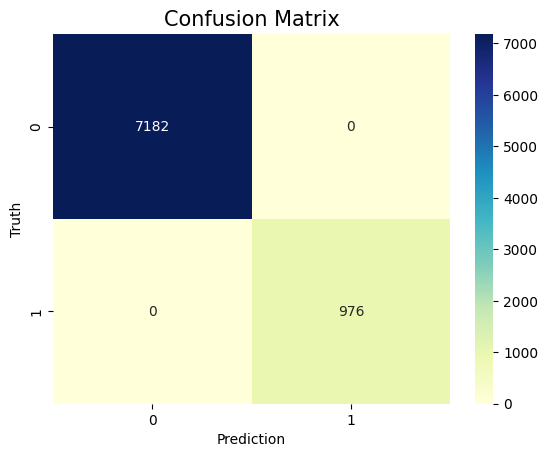

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_binary)  # create the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')  # show in the form of heat map

plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)

plt.show()